In [1]:
import mglearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

In [2]:
iris= load_iris()

In [3]:
df= pd.DataFrame(data= iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
tsne= TSNE(n_components= 2).fit_transform(df)

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [5]:
tsne

array([[ -9.875694 , -24.557793 ],
       [ -8.841839 , -21.90763  ],
       [-10.014076 , -22.066578 ],
       [ -9.619242 , -21.609442 ],
       [ -9.707472 , -24.576649 ],
       [ -9.27287  , -26.611889 ],
       [-10.408439 , -22.268902 ],
       [ -9.46626  , -23.872032 ],
       [ -9.695772 , -20.841516 ],
       [ -9.046072 , -22.45924  ],
       [ -9.967899 , -26.116268 ],
       [ -9.065797 , -23.264805 ],
       [ -9.101258 , -21.657164 ],
       [-10.325637 , -20.746672 ],
       [-10.158167 , -27.410332 ],
       [ -9.596428 , -27.639536 ],
       [ -9.76507  , -26.733608 ],
       [ -9.596425 , -24.656797 ],
       [-10.263408 , -26.880133 ],
       [ -9.176624 , -25.722015 ],
       [-10.578044 , -25.481386 ],
       [ -9.131597 , -25.367489 ],
       [-11.222581 , -22.515097 ],
       [ -8.388721 , -24.260267 ],
       [ -8.14341  , -23.359001 ],
       [ -8.4403715, -22.360577 ],
       [ -8.823955 , -24.16118  ],
       [ -9.845583 , -25.041628 ],
       [-10.203702 ,

In [6]:
tsne_df= pd.DataFrame(tsne, columns= ['component0', 'component1'])
tsne_df

,component0,component1
0,-9.875694,-24.557793
1,-8.841839,-21.907631
2,-10.014076,-22.066578
3,-9.619242,-21.609442
4,-9.707472,-24.576649
...,...,...
145,4.262182,4.622246
146,4.817377,7.704380
147,4.298022,5.564950
148,5.001832,4.009303


### t-sne 2차원 데이터 시각화

In [7]:
tsne_df['target']= iris.target

In [8]:
tsne_df_0= tsne_df[tsne_df['target'] == 0]
tsne_df_1= tsne_df[tsne_df['target'] == 1]
tsne_df_2= tsne_df[tsne_df['target'] == 2]

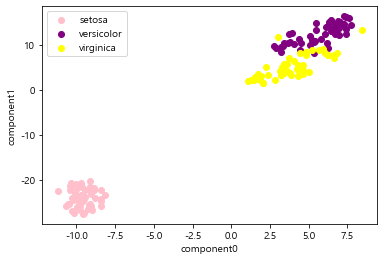

In [9]:
plt.scatter(tsne_df_0['component0'], tsne_df_0['component1'], 
            color= 'pink', label= 'setosa')
plt.scatter(tsne_df_1['component0'], tsne_df_1['component1'], 
            color= 'purple', label= 'versicolor')
plt.scatter(tsne_df_2['component0'], tsne_df_2['component1'], 
            color= 'yellow', label= 'virginica')
plt.xlabel('component0')
plt.ylabel('component1')
plt.legend()
plt.show()

### 3차원 t-sne 시각화

In [10]:
# t-sne 모델 불러오기 + 학습 및 변환
tsne= TSNE(n_components= 3).fit_transform(df)
# 데이터 프레임 변환시킨 데이터 바꾸기
tsne_df= pd.DataFrame(tsne,
                      columns= ['component0', 'component1', 'component2'])
tsne_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,component0,component1,component2
0,-78.343445,-34.001167,69.385559
1,2.056073,54.569000,112.568298
2,91.288887,-88.206596,55.632999
3,63.559620,-57.507648,30.714724
4,8.065083,-122.193855,11.637176
...,...,...,...
145,-102.766510,-84.189560,-89.223351
146,1.792091,49.824184,-97.625801
147,98.855400,111.878708,-40.753010
148,-102.243668,44.216194,-84.674011


In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
tsne_df['target']= iris.target

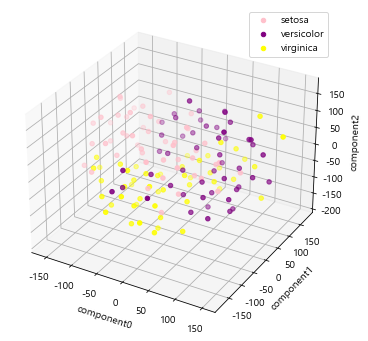

In [13]:
fig= plt.figure(figsize= (9, 6))
ax= fig.add_subplot(111, projection= '3d')

tsne_df_0= tsne_df[tsne_df['target'] == 0]
tsne_df_1= tsne_df[tsne_df['target'] == 1]
tsne_df_2= tsne_df[tsne_df['target'] == 2]

ax.scatter(tsne_df_0['component0'], tsne_df_0['component1'], tsne_df_0['component2'],
            color= 'pink', label= 'setosa')
ax.scatter(tsne_df_1['component0'], tsne_df_1['component1'], tsne_df_1['component2'],
            color= 'purple', label= 'versicolor')
ax.scatter(tsne_df_2['component0'], tsne_df_2['component1'], tsne_df_2['component2'],
            color= 'yellow', label= 'virginica')
ax.set_xlabel('component0')
ax.set_ylabel('component1')
ax.set_zlabel('component2')
ax.legend()
plt.show()